<a href="https://colab.research.google.com/github/arutraj/ML_Basics/blob/main/CNN_and_hyperparameter_tuning_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Steps to build CNN to solve Emergency vs Non-Emergency vehicle classification problem

1. Loading the Dataset
2. Pre-processing the Data
3. Creating Training and Validation set
4. Defining the Model Architecture
5. Compiling the Model
6. Training the Model
7. Evaluating model performance

## 1. Loading the Dataset

In [43]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer, BatchNormalization, Dropout
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [91]:
# unzipping the Dataset.zip file
#!unzip /content/drive/My\ Drive/Dataset.zip
!ls /content/drive/MyDrive/AnalyticsVidya/DeepLearning/images/*jpg |wc -l

2352


In [92]:
# create random number generator
seed = 42

In [93]:
# reading the csv file
data = pd.read_csv('/content/emergency_classification.csv')

In [48]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('/content/drive/MyDrive/AnalyticsVidya/DeepLearning/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [49]:
# shape of the images
X.shape

(2352, 224, 224, 3)

## 2. Pre-processing the Data

In [ ]:
# since we are using CNN, we do not have to resize the images into 1D array.

In [50]:
# normalizing the pixel values
X = X / X.max()

## 3. Creating Training and Validation set

In [51]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [52]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

## 4. Defining the Model Architecture

![alt text](https://drive.google.com/uc?id=1qsops2ZfESuzjg7-V0rmOfVE0PtErYrJ)

In [53]:
# importing the convolutional and flatten layer from keras
from keras.layers import Conv2D, Flatten

In [54]:
# defining the model architecture

# creating a sequential model
model = Sequential()

# defining input layer with 3D input of shape (224,224,3)
model.add(InputLayer(input_shape=(224, 224, 3)))

# defining the first convolutional layer with 25 filters of size (5,5)
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# defining the second convolutional layer with 50 filters of size (5,5)
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

# flattening the output from convolutional layers so that it can be forwarded to the dense layers
model.add(Flatten())

# defining the first dense or fully connected layer with 100 neurons
model.add(Dense(units=100, activation='sigmoid'))
# defining the output layer with 1 neuron since it is a binary classification problem
model.add(Dense(units=1, activation='sigmoid'))

In [55]:
# printing summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 220, 220, 25)      1900      
                                                                 
 conv2d_5 (Conv2D)           (None, 216, 216, 50)      31300     
                                                                 
 flatten_2 (Flatten)         (None, 2332800)           0         
                                                                 
 dense_4 (Dense)             (None, 100)               233280100 
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 233313401 (890.02 MB)
Trainable params: 233313401 (890.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Understanding the Architecture
*  Input shape is (224,224,3) since images are of this shape
*  We then applied 25 filters each of shape (5,5) and stride is (1,1)
*  So the output from first convolutional layer is: **(224-5+1,224-5+1,25)** which is **(220,220,25)**
*  We then applied 50 filters of shape (5,5) each with stride (1,1)
*  Then the output is **(220-5+1,220-5+1,50)** which is **(216,216,50)**
*  Then this output is flattened which resulted in 216 X 216 X 50 = 2332800 features
*  Finally these features are passed through the fully connected layers.


## Understanding the number of parameters of different layers

1.   First Convolutional Layer
    * Number of input channels = 3
    * Number of filters = 25
    * Filter Size = (5,5)
    * Learnable parameters = **25 * 5 * 5 * 3 + 25** (1 bias for each filter) = **1900**
2.   Second Convolutional Layer
    * Number of input channels = 25
    * Number of filters = 50
    * Filter Size = (5,5)
    * Learnable parameters = **50 * 5 * 5 * 25 + 50** (1 bias for each filter) = **31300**
3.   First Fully Connected Layer
    * Number of input features = 216 * 216 * 50 = 2332800
    * Number of neurons in this hidden layer = 100
    * Learnable parameters = **2332800 * 100 + 100** (1 bias for each neuron) = **233280100**
3.   Output Layer
    * Number of input features = 100
    * Number of neurons in this layer = 1
    * Learnable parameters = **100 * 1 + 1** (1 bias for each neuron) = **101**



## 5. Compiling the Model

In [56]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

## 6. Training the Model

In [57]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 69s 5s/step - loss: 0.7289 - accuracy: 0.5541 - val_loss: 0.6567 - val_accuracy: 0.5765
Epoch 2/10
13/13 [==============================] - 66s 5s/step - loss: 0.6367 - accuracy: 0.6349 - val_loss: 0.6326 - val_accuracy: 0.6388
Epoch 3/10
13/13 [==============================] - 66s 5s/step - loss: 0.6254 - accuracy: 0.6525 - val_loss: 0.6066 - val_accuracy: 0.6728
Epoch 4/10
13/13 [==============================] - 67s 5s/step - loss: 0.6117 - accuracy: 0.6786 - val_loss: 0.5967 - val_accuracy: 0.6785
Epoch 5/10
13/13 [==============================] - 67s 5s/step - loss: 0.5865 - accuracy: 0.6859 - val_loss: 0.6022 - val_accuracy: 0.6728
Epoch 6/10
13/13 [==============================] - 67s 5s/step - loss: 0.5865 - accuracy: 0.6908 - val_loss: 0.5963 - val_accuracy: 0.6771
Epoch 7/10
13/13 [==============================] - 67s 5s/step - loss: 0.5768 - accuracy: 0.6993 - val_loss: 0.6085 - val_accuracy: 0.6714
Epoch 8/10
13/13 [==

## 7. Evaluating model performance

In [71]:
# accuracy on training set
#print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))
#print('Accuracy on training set:', accuracy_score(y_train, np.where((model.predict(X_train)>0.5).ravel())))
#print('Accuracy on training set:', accuracy_score(y_train, model.predict(X_train)), '%')
print(model.predict(X_train).shape)
model.predict(X_train).reshape((-1, 1))
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train).reshape((-1, 1))[:,0]) < 0.5, 0,1).ravel())
#print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1).ravel())

52/52 [==============================] - 8s 154ms/step
(1646, 1)
52/52 [==============================] - 8s 151ms/step


TypeError: '<' not supported between instances of 'tuple' and 'float'

In [94]:
# Reshape the prediction output to a 1D array
y_pred = model.predict(X_train).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_train, np.where(y_pred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

52/52 [==============================] - 12s 222ms/step
Accuracy on training set: 0.6871202916160389


In [73]:
# accuracy on validation set
#print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_vpred = model.predict(X_valid).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_valid, np.where(y_vpred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

23/23 [==============================] - 4s 152ms/step
Accuracy on training set: 0.7152974504249292


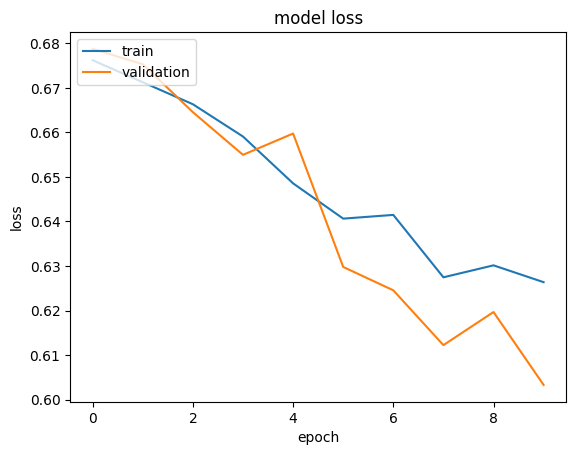

In [95]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

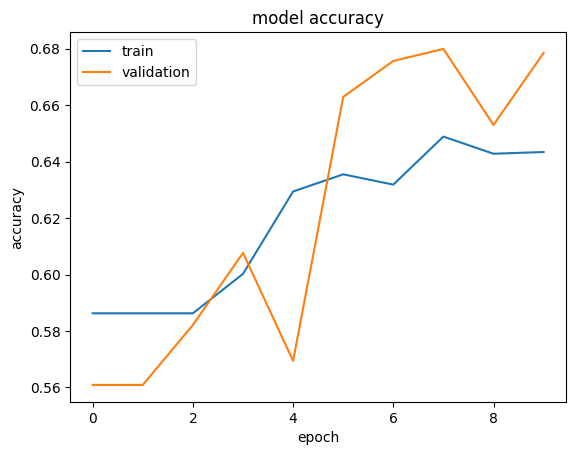

In [96]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Adding Maxpool layer to reduce parameters

In [76]:
# importing maxpool layer from keras
from keras.layers import MaxPool2D

In [77]:
# defining the model architecture with maxpool layer
model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# adding maxpool layer after the convolutional layers
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [78]:
# summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 220, 220, 25)      1900      
                                                                 
 conv2d_7 (Conv2D)           (None, 216, 216, 50)      31300     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 50)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 145800)            0         
                                                                 
 dense_6 (Dense)             (None, 100)               14580100  
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                      

In [80]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 65s 5s/step - loss: 0.6572 - accuracy: 0.6039 - val_loss: 0.6600 - val_accuracy: 0.5652
Epoch 2/10
13/13 [==============================] - 63s 5s/step - loss: 0.6342 - accuracy: 0.6495 - val_loss: 0.6442 - val_accuracy: 0.6062
Epoch 3/10
13/13 [==============================] - 63s 5s/step - loss: 0.6367 - accuracy: 0.6549 - val_loss: 0.6365 - val_accuracy: 0.6204
Epoch 4/10
13/13 [==============================] - 63s 5s/step - loss: 0.6193 - accuracy: 0.6567 - val_loss: 0.6036 - val_accuracy: 0.6912
Epoch 5/10
13/13 [==============================] - 63s 5s/step - loss: 0.6172 - accuracy: 0.6592 - val_loss: 0.6060 - val_accuracy: 0.6841
Epoch 6/10
13/13 [==============================] - 64s 5s/step - loss: 0.5933 - accuracy: 0.6938 - val_loss: 0.6354 - val_accuracy: 0.6289
Epoch 7/10
13/13 [==============================] - 63s 5s/step - loss: 0.5936 - accuracy: 0.6883 - val_loss: 0.6127 - val_accuracy: 0.6544
Epoch 8/10
13/13 [==

In [81]:
# accuracy on training set
#print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_pred = model.predict(X_train).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_train, np.where(y_pred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

52/52 [==============================] - 6s 120ms/step
Accuracy on training set: 0.7345078979343864


In [82]:
# accuracy on validation set
#print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_vpred = model.predict(X_valid).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_valid, np.where(y_vpred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

23/23 [==============================] - 3s 108ms/step
Accuracy on training set: 0.6912181303116147


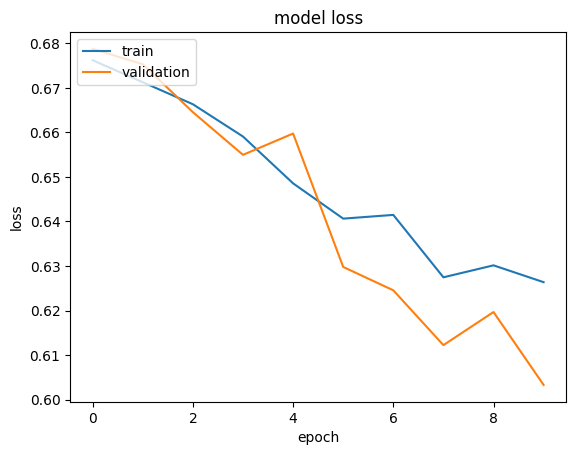

In [97]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

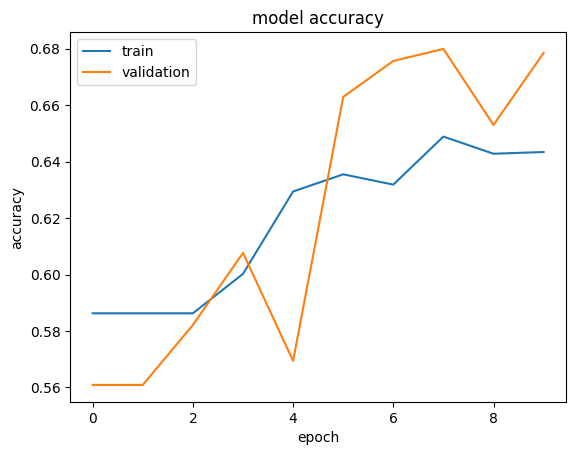

In [98]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Hyperparameter Tuning of Convolutional Neural Networks

1. increase number of convolutional layers
2. increase number of pooling layers
3. increase number of convolutional filters
4. change size of convolutional filters
5. change pooling type
6. change padding technique
7. change stride

#### Hyperparameters of fully connected layers

1. change activation function of hidden layer
2. increase hidden neurons
3. increase hidden layers
4. increase number of epochs
5. change optimizer
6. add batch normalization layer
7. add dropout layer

## 1. Increasing number of convolutional layers

In [ ]:
so far -
# creating a sequential model
#model = Sequential()

# defining input layer with 3D input of shape (224,224,3)
#model.add(InputLayer(input_shape=(224, 224, 3)))

# defining the first convolutional layer with 25 filters of size (5,5)
#model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
# defining the second convolutional layer with 50 filters of size (5,5)
#model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))

# flattening the output from convolutional layers so that it can be forwarded to the dense layers
#model.add(Flatten())

# defining the first dense or fully connected layer with 100 neurons
#model.add(Dense(units=100, activation='sigmoid'))
# defining the output layer with 1 neuron since it is a binary classification problem
#model.add(Dense(units=1, activation='sigmoid'))

In [86]:
# increase number of convolutional layers

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 220, 220, 25)      1900      
                                                                 
 conv2d_12 (Conv2D)          (None, 216, 216, 50)      31300     
                                                                 
 conv2d_13 (Conv2D)          (None, 212, 212, 50)      62550     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 53, 53, 50)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 140450)            0         
                                                                 
 dense_10 (Dense)            (None, 100)               14045100  
                                                      

In [88]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 146s 11s/step - loss: 0.6762 - accuracy: 0.5863 - val_loss: 0.6788 - val_accuracy: 0.5609
Epoch 2/10
13/13 [==============================] - 144s 11s/step - loss: 0.6713 - accuracy: 0.5863 - val_loss: 0.6753 - val_accuracy: 0.5609
Epoch 3/10
13/13 [==============================] - 144s 11s/step - loss: 0.6663 - accuracy: 0.5863 - val_loss: 0.6646 - val_accuracy: 0.5822
Epoch 4/10
13/13 [==============================] - 145s 11s/step - loss: 0.6591 - accuracy: 0.6002 - val_loss: 0.6550 - val_accuracy: 0.6076
Epoch 5/10
13/13 [==============================] - 146s 11s/step - loss: 0.6486 - accuracy: 0.6294 - val_loss: 0.6598 - val_accuracy: 0.5694
Epoch 6/10
13/13 [==============================] - 145s 11s/step - loss: 0.6406 - accuracy: 0.6355 - val_loss: 0.6298 - val_accuracy: 0.6629
Epoch 7/10
13/13 [==============================] - 145s 11s/step - loss: 0.6415 - accuracy: 0.6318 - val_loss: 0.6245 - val_accuracy: 0.6756
Epoch 

In [89]:
# accuracy on training set
#print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_pred = model.predict(X_train).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_train, np.where(y_pred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

52/52 [==============================] - 12s 225ms/step
Accuracy on training set: 0.6871202916160389


In [100]:
# accuracy on validation set
#print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_vpred = model.predict(X_valid).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_valid, np.where(y_vpred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

23/23 [==============================] - 5s 211ms/step
Accuracy on training set: 0.6784702549575071


## 2. Increasing number of pooling layers

In [101]:
# increase number of pooling layers

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 220, 220, 25)      1900      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 55, 55, 25)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 51, 51, 50)        31300     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 12, 12, 50)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 7200)              0         
                                                                 
 dense_12 (Dense)            (None, 100)              

In [103]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 14s 1s/step - loss: 0.7232 - accuracy: 0.4429 - val_loss: 0.6908 - val_accuracy: 0.5567
Epoch 2/10
13/13 [==============================] - 12s 940ms/step - loss: 0.6828 - accuracy: 0.5863 - val_loss: 0.6876 - val_accuracy: 0.5609
Epoch 3/10
13/13 [==============================] - 12s 937ms/step - loss: 0.6793 - accuracy: 0.5863 - val_loss: 0.6885 - val_accuracy: 0.5609
Epoch 4/10
13/13 [==============================] - 12s 945ms/step - loss: 0.6781 - accuracy: 0.5863 - val_loss: 0.6874 - val_accuracy: 0.5609
Epoch 5/10
13/13 [==============================] - 12s 948ms/step - loss: 0.6768 - accuracy: 0.5863 - val_loss: 0.6861 - val_accuracy: 0.5609
Epoch 6/10
13/13 [==============================] - 12s 939ms/step - loss: 0.6763 - accuracy: 0.5863 - val_loss: 0.6851 - val_accuracy: 0.5609
Epoch 7/10
13/13 [==============================] - 12s 941ms/step - loss: 0.6752 - accuracy: 0.5863 - val_loss: 0.6836 - val_accuracy: 0.5609
Ep

In [104]:
# accuracy on training set  ## information loss with adding more pooling layers
#print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_pred = model.predict(X_train).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_train, np.where(y_pred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

52/52 [==============================] - 2s 37ms/step
Accuracy on training set: 0.586269744835966


In [105]:
# accuracy on validation set
#print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_vpred = model.predict(X_valid).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_valid, np.where(y_vpred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

23/23 [==============================] - 1s 34ms/step
Accuracy on training set: 0.5609065155807366


## 3. Increasing number of convolutional filters

In [106]:
# increase number of convolutional filters

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(75, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 220, 220, 50)      3800      
                                                                 
 conv2d_17 (Conv2D)          (None, 216, 216, 75)      93825     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 75)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 218700)            0         
                                                                 
 dense_14 (Dense)            (None, 100)               21870100  
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                      

In [108]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 122s 9s/step - loss: 0.6766 - accuracy: 0.5863 - val_loss: 0.6773 - val_accuracy: 0.5609
Epoch 2/10
13/13 [==============================] - 120s 9s/step - loss: 0.6699 - accuracy: 0.5863 - val_loss: 0.6694 - val_accuracy: 0.5609
Epoch 3/10
13/13 [==============================] - 120s 9s/step - loss: 0.6617 - accuracy: 0.5875 - val_loss: 0.6599 - val_accuracy: 0.5737
Epoch 4/10
13/13 [==============================] - 120s 9s/step - loss: 0.6517 - accuracy: 0.6021 - val_loss: 0.6503 - val_accuracy: 0.6006
Epoch 5/10
13/13 [==============================] - 122s 9s/step - loss: 0.6439 - accuracy: 0.6422 - val_loss: 0.6381 - val_accuracy: 0.6487
Epoch 6/10
13/13 [==============================] - 122s 9s/step - loss: 0.6323 - accuracy: 0.6574 - val_loss: 0.6252 - val_accuracy: 0.6856
Epoch 7/10
13/13 [==============================] - 122s 9s/step - loss: 0.6227 - accuracy: 0.6628 - val_loss: 0.6156 - val_accuracy: 0.6756
Epoch 8/10
13

In [109]:
# accuracy on training set
#print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_pred = model.predict(X_train).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_train, np.where(y_pred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

52/52 [==============================] - 11s 215ms/step
Accuracy on training set: 0.6950182260024301


In [110]:
# accuracy on validation set
#print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_vpred = model.predict(X_valid).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_valid, np.where(y_vpred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

23/23 [==============================] - 5s 206ms/step
Accuracy on training set: 0.7053824362606232


## 4. Changing size of convolutional filters

In [111]:
# change filter size for convolutional layer

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (3, 3), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 25)      700       
                                                                 
 conv2d_19 (Conv2D)          (None, 220, 220, 50)      11300     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 55, 55, 50)        0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 151250)            0         
                                                                 
 dense_16 (Dense)            (None, 100)               15125100  
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                      

In [113]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 33s 2s/step - loss: 0.6876 - accuracy: 0.5601 - val_loss: 0.6755 - val_accuracy: 0.5510
Epoch 2/10
13/13 [==============================] - 31s 2s/step - loss: 0.6617 - accuracy: 0.6094 - val_loss: 0.6640 - val_accuracy: 0.6473
Epoch 3/10
13/13 [==============================] - 31s 2s/step - loss: 0.6528 - accuracy: 0.6264 - val_loss: 0.6488 - val_accuracy: 0.6388
Epoch 4/10
13/13 [==============================] - 32s 2s/step - loss: 0.6409 - accuracy: 0.6385 - val_loss: 0.6386 - val_accuracy: 0.6501
Epoch 5/10
13/13 [==============================] - 31s 2s/step - loss: 0.6357 - accuracy: 0.6452 - val_loss: 0.6289 - val_accuracy: 0.6799
Epoch 6/10
13/13 [==============================] - 32s 2s/step - loss: 0.6239 - accuracy: 0.6683 - val_loss: 0.6231 - val_accuracy: 0.6615
Epoch 7/10
13/13 [==============================] - 32s 2s/step - loss: 0.6246 - accuracy: 0.6567 - val_loss: 0.6161 - val_accuracy: 0.6785
Epoch 8/10
13/13 [==

In [114]:
# accuracy on training set
#print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_pred = model.predict(X_train).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_train, np.where(y_pred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

52/52 [==============================] - 5s 84ms/step
Accuracy on training set: 0.6950182260024301


In [115]:
# accuracy on validation set
#print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_vpred = model.predict(X_valid).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_valid, np.where(y_vpred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

23/23 [==============================] - 2s 81ms/step
Accuracy on training set: 0.6883852691218131


## 5. Changing pooling size

In [116]:
# change pooling size

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 220, 220, 25)      1900      
                                                                 
 conv2d_21 (Conv2D)          (None, 216, 216, 50)      31300     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 108, 108, 50)      0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 583200)            0         
                                                                 
 dense_18 (Dense)            (None, 100)               58320100  
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                      

In [118]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 68s 5s/step - loss: 0.6928 - accuracy: 0.5620 - val_loss: 0.6720 - val_accuracy: 0.5822
Epoch 2/10
13/13 [==============================] - 66s 5s/step - loss: 0.6568 - accuracy: 0.6045 - val_loss: 0.6462 - val_accuracy: 0.6544
Epoch 3/10
13/13 [==============================] - 66s 5s/step - loss: 0.6501 - accuracy: 0.6245 - val_loss: 0.7489 - val_accuracy: 0.5623
Epoch 4/10
13/13 [==============================] - 67s 5s/step - loss: 0.6364 - accuracy: 0.6349 - val_loss: 0.6366 - val_accuracy: 0.6261
Epoch 5/10
13/13 [==============================] - 66s 5s/step - loss: 0.6220 - accuracy: 0.6586 - val_loss: 0.6321 - val_accuracy: 0.6317
Epoch 6/10
13/13 [==============================] - 66s 5s/step - loss: 0.5995 - accuracy: 0.6908 - val_loss: 0.5910 - val_accuracy: 0.6955
Epoch 7/10
13/13 [==============================] - 66s 5s/step - loss: 0.5895 - accuracy: 0.6902 - val_loss: 0.6024 - val_accuracy: 0.6771
Epoch 8/10
13/13 [==

In [119]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train).reshape(-1)) < 0.5, 0,1))



52/52 [==============================] - 7s 129ms/step


TypeError: '<' not supported between instances of 'tuple' and 'float'

In [120]:
# Reshape the prediction output to a 1D array
y_pred = model.predict(X_train).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_train, np.where(y_pred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

52/52 [==============================] - 7s 126ms/step
Accuracy on training set: 0.7205346294046172


In [121]:
# accuracy on validation set
#print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))
# Reshape the prediction output to a 1D array
y_vpred = model.predict(X_valid).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_valid, np.where(y_vpred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

23/23 [==============================] - 3s 125ms/step
Accuracy on training set: 0.6912181303116147


## 6. Changing padding technique

In [122]:
# change padding technique

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [123]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 224, 224, 25)      1900      
                                                                 
 conv2d_23 (Conv2D)          (None, 224, 224, 50)      31300     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 56, 56, 50)        0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 156800)            0         
                                                                 
 dense_20 (Dense)            (None, 100)               15680100  
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                     

In [124]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 70s 5s/step - loss: 0.6851 - accuracy: 0.5510 - val_loss: 0.6852 - val_accuracy: 0.5609
Epoch 2/10
13/13 [==============================] - 67s 5s/step - loss: 0.6709 - accuracy: 0.5857 - val_loss: 0.6810 - val_accuracy: 0.5609
Epoch 3/10
13/13 [==============================] - 68s 5s/step - loss: 0.6618 - accuracy: 0.5923 - val_loss: 0.6627 - val_accuracy: 0.5708
Epoch 4/10
13/13 [==============================] - 68s 5s/step - loss: 0.6536 - accuracy: 0.6160 - val_loss: 0.6519 - val_accuracy: 0.5977
Epoch 5/10
13/13 [==============================] - 68s 5s/step - loss: 0.6436 - accuracy: 0.6361 - val_loss: 0.6377 - val_accuracy: 0.6671
Epoch 6/10
13/13 [==============================] - 68s 5s/step - loss: 0.6335 - accuracy: 0.6525 - val_loss: 0.6339 - val_accuracy: 0.6317
Epoch 7/10
13/13 [==============================] - 68s 5s/step - loss: 0.6245 - accuracy: 0.6598 - val_loss: 0.6189 - val_accuracy: 0.6686
Epoch 8/10
13/13 [==

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))


Accuracy on training set: 0.6318347509113001 %


In [125]:
# Reshape the prediction output to a 1D array
y_pred = model.predict(X_train).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_train, np.where(y_pred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)


52/52 [==============================] - 7s 130ms/step
Accuracy on training set: 0.6907654921020656


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))


Accuracy on validation set: 0.623229461756374 %


In [126]:
# Reshape the prediction output to a 1D array
y_vpred = model.predict(X_valid).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_valid, np.where(y_vpred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

23/23 [==============================] - 3s 122ms/step
Accuracy on training set: 0.6742209631728046


## 7. Changing stride

In [127]:
# changing stride

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(25, (5, 5), activation='relu', strides=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [128]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 110, 110, 25)      1900      
                                                                 
 conv2d_25 (Conv2D)          (None, 106, 106, 50)      31300     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 50)        0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 33800)             0         
                                                                 
 dense_22 (Dense)            (None, 100)               3380100   
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                     

In [129]:
# training the model
model_history = model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
13/13 [==============================] - 19s 1s/step - loss: 0.7260 - accuracy: 0.5103 - val_loss: 0.6974 - val_accuracy: 0.5397
Epoch 2/10
13/13 [==============================] - 17s 1s/step - loss: 0.6835 - accuracy: 0.5765 - val_loss: 0.6883 - val_accuracy: 0.5368
Epoch 3/10
13/13 [==============================] - 17s 1s/step - loss: 0.6765 - accuracy: 0.5765 - val_loss: 0.6820 - val_accuracy: 0.5609
Epoch 4/10
13/13 [==============================] - 17s 1s/step - loss: 0.6710 - accuracy: 0.5863 - val_loss: 0.6747 - val_accuracy: 0.5609
Epoch 5/10
13/13 [==============================] - 17s 1s/step - loss: 0.6640 - accuracy: 0.5990 - val_loss: 0.6715 - val_accuracy: 0.5567
Epoch 6/10
13/13 [==============================] - 17s 1s/step - loss: 0.6583 - accuracy: 0.5966 - val_loss: 0.6582 - val_accuracy: 0.6020
Epoch 7/10
13/13 [==============================] - 17s 1s/step - loss: 0.6501 - accuracy: 0.6276 - val_loss: 0.6488 - val_accuracy: 0.6601
Epoch 8/10
13/13 [==

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))

Accuracy on training set: 0.6318347509113001 %


In [130]:
# Reshape the prediction output to a 1D array
y_pred = model.predict(X_train).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_train, np.where(y_pred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

52/52 [==============================] - 2s 31ms/step
Accuracy on training set: 0.6749696233292831


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))

Accuracy on validation set: 0.623229461756374 %


In [131]:
# Reshape the prediction output to a 1D array
y_vpred = model.predict(X_valid).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_valid, np.where(y_vpred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on validation set:', accuracy)

23/23 [==============================] - 1s 30ms/step
Accuracy on training set: 0.6784702549575071


## Combining Hyperparameter tuning

In [132]:
# defining the model architecture with maxpool layer

model = Sequential()

model.add(InputLayer(input_shape=(224, 224, 3)))

model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Conv2D(50, (5, 5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPool2D(pool_size=(4, 4), padding='valid'))

model.add(Flatten())

model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.6))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [133]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 220, 220, 50)      3800      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 50)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 106, 106, 50)      62550     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 26, 26, 50)        0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 33800)             0         
                                                                 
 dense_24 (Dense)            (None, 100)             

In [134]:
# training the model for 100 epochs
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/100
13/13 [==============================] - 42s 3s/step - loss: 0.9127 - accuracy: 0.5911 - val_loss: 0.5754 - val_accuracy: 0.7365
Epoch 2/100
13/13 [==============================] - 39s 3s/step - loss: 0.6681 - accuracy: 0.7096 - val_loss: 0.5029 - val_accuracy: 0.7776
Epoch 3/100
13/13 [==============================] - 39s 3s/step - loss: 0.5851 - accuracy: 0.7558 - val_loss: 0.4843 - val_accuracy: 0.7805
Epoch 4/100
13/13 [==============================] - 39s 3s/step - loss: 0.5517 - accuracy: 0.7655 - val_loss: 0.4602 - val_accuracy: 0.8102
Epoch 5/100
13/13 [==============================] - 39s 3s/step - loss: 0.4590 - accuracy: 0.8056 - val_loss: 0.5358 - val_accuracy: 0.7266
Epoch 6/100
13/13 [==============================] - 39s 3s/step - loss: 0.4146 - accuracy: 0.8238 - val_loss: 1.2682 - val_accuracy: 0.4816
Epoch 7/100
13/13 [==============================] - 39s 3s/step - loss: 0.3605 - accuracy: 0.8578 - val_loss: 0.3832 - val_accuracy: 0.8357
Epoch 8/100
1

In [ ]:
# accuracy on training set
print('Accuracy on training set:', accuracy_score(y_train, np.where(model.predict(X_train)[:,0]) < 0.5, 0,1))

Accuracy on training set: 0.6318347509113001 %


In [135]:
# Reshape the prediction output to a 1D array
y_pred = model.predict(X_train).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_train, np.where(y_pred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on training set:', accuracy)

52/52 [==============================] - 6s 110ms/step
Accuracy on training set: 0.9975698663426489


In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0]) < 0.5, 0,1))

Accuracy on validation set: 0.623229461756374 %


In [136]:
# Reshape the prediction output to a 1D array
y_vpred = model.predict(X_valid).reshape(-1)

# Calculate the accuracy
accuracy = accuracy_score(y_valid, np.where(y_vpred < 0.5, 0, 1))

# Print the accuracy
print('Accuracy on validation set:', accuracy)

23/23 [==============================] - 2s 103ms/step
Accuracy on validation set: 0.839943342776204


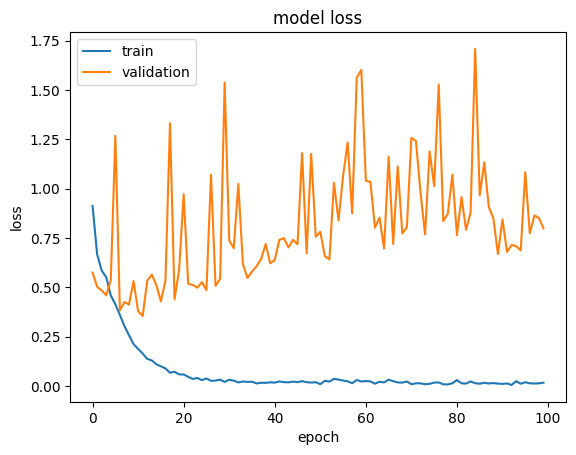

In [137]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

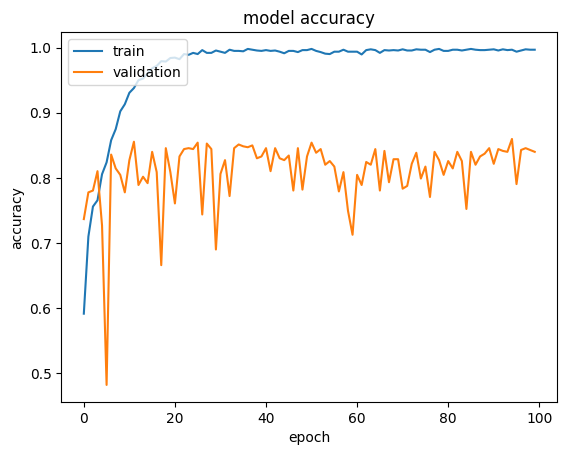

In [138]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()